# Python C/C++ Bindings

## Integratioon with C/C++

Python has ways to implement C/C++ binding. It also integrate with OS wide libraries no matter the language that was written on.

- `struct` - To pack data in a simmilar manner as the `struct` in C/C++
- `ctypes` - To work with C/C++ primitive data types and library

## Struct

`struct` module is used to pack data in a similar manner as `struct` block in C/C++

- `pack` - Returns a list of bytes organized in a `struct` block
- `unpack` - Returns a tuple of values from a `struct` bloc
- `calcsize` - Returns the size of a `struct` block in bytes

**format**
information about endian, size and allignment

Begining of the format string:
- `@` - Native Endian, Native Alignment, Native Size
- `=` - Native Endian, Standard size
- `<` - Little Endian, Standard size
- `>` - Big Endian
- `!` - Big Endian (For networking)

Contents of the formatted string:

- c - char
- b - signed char
- B - Unsigned char
- ? - boolean
- h - short
- H - Unsigned short
- i - integer
- I - Unsinged integer
- l - long
- L - Unsigned long
- q - long long
- Q - Unsigned long long
- f - float
- d - double
- x - padding byte

Pointer specifications:

- N - `size_t`
- s - `char[n]`
- p - Pascal `string`
- P - `void*`

## OS Architecture and Struct

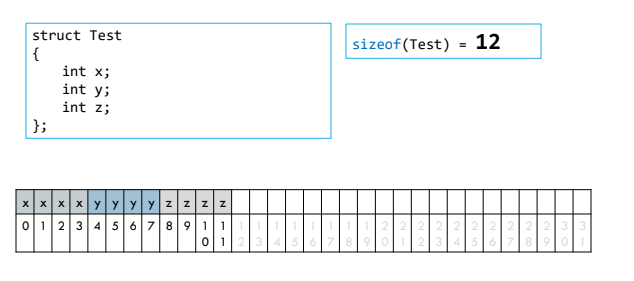

In [1]:
import struct

data = struct.pack("@iii",1,2,3)

print(len(data))
s = ""
for i in data:
    s += "%02X " % i

print(s)

12
01 00 00 00 02 00 00 00 03 00 00 00 


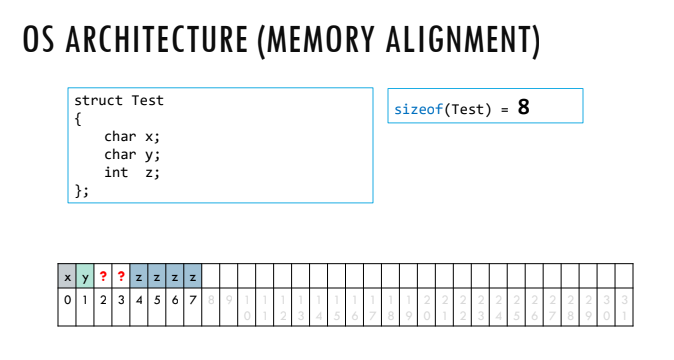

In [2]:
data = struct.pack("@cci",b'A',b'B',3)

print(len(data))
s = ""
for i in data:
    s += "%02X " % i

print(s)

8
41 42 00 00 03 00 00 00 


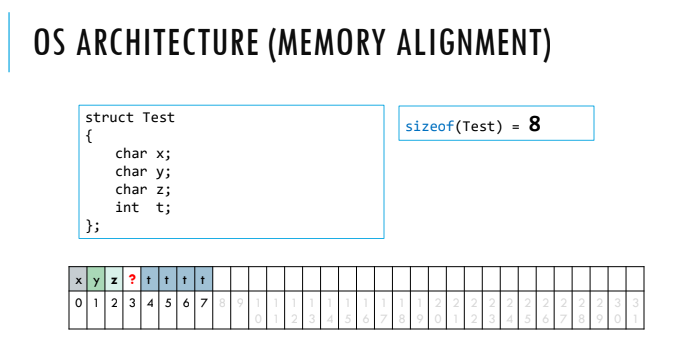

In [3]:
data = struct.pack("@ccci",b'A',b'B',b'C',3)

print(len(data))
s = ""
for i in data:
    s += "%02X " % i

print(s)

8
41 42 43 00 03 00 00 00 


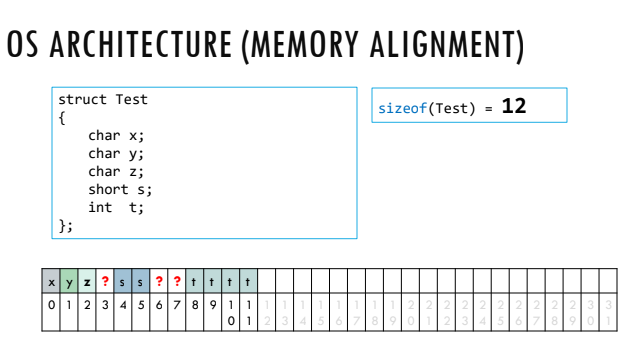

In [4]:
data = struct.pack("@ccchi",b'A',b'B',b'C',3, 4)

print(len(data))
s = ""
for i in data:
    s += "%02X " % i

print(s)

12
41 42 43 00 03 00 00 00 04 00 00 00 


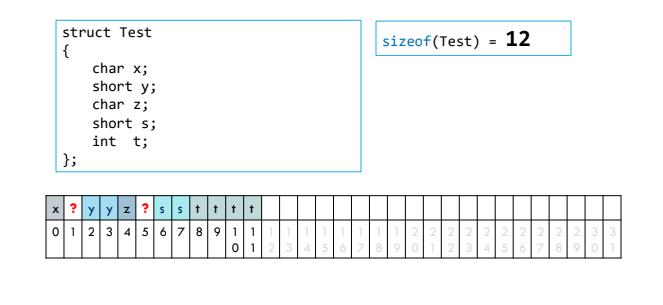

In [5]:
data = struct.pack("@chchi",b'A', 1, b'B', 2, 3)

print(len(data))
s = ""
for i in data:
    s += "%02X " % i

print(s)

12
41 00 01 00 42 00 02 00 03 00 00 00 


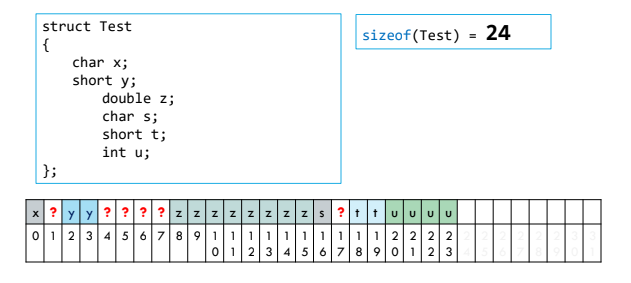

In [6]:
data = struct.pack("@chdchi",b'A', 1, 1.0, b'B', 2, 3)

print(len(data))
s = ""
for i in data:
    s += "%02X " % i

print(s)

24
41 00 01 00 00 00 00 00 00 00 00 00 00 00 F0 3F 42 00 02 00 03 00 00 00 


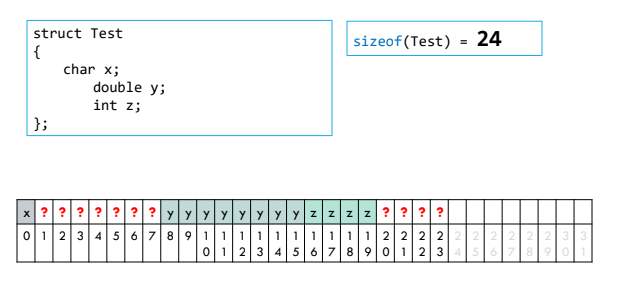

In [7]:
data = struct.pack("@cdi",b'A', 1.0, 3)

print(len(data)) # WRONG! Should have been 24
s = ""
for i in data:
    s += "%02X " % i

print(s)

20
41 00 00 00 00 00 00 00 00 00 00 00 00 00 F0 3F 03 00 00 00 


Potential fix

In [8]:
data = struct.pack("@cdi0d", b'A', 1.0, 3)

print(len(data))
s = ""
for i in data:
    s += "%02X " % i

print(s)

24
41 00 00 00 00 00 00 00 00 00 00 00 00 00 F0 3F 03 00 00 00 00 00 00 00 


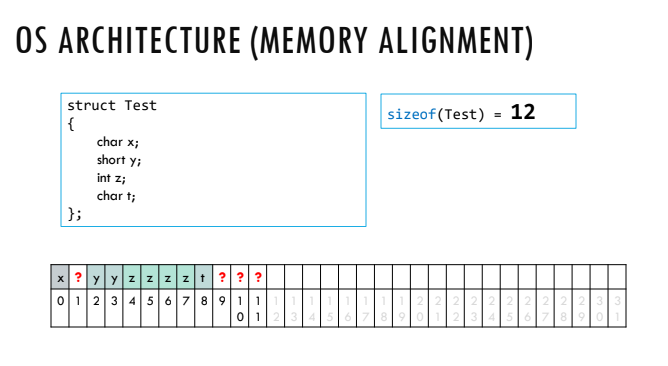

In [9]:
data = struct.pack("@chic0i", b'A', 1, 2, b'B')

print(len(data))  # specify 0i, it would result size being 9
s = ""
for i in data:
    s += "%02X " % i

print(s)

12
41 00 01 00 02 00 00 00 42 00 00 00 


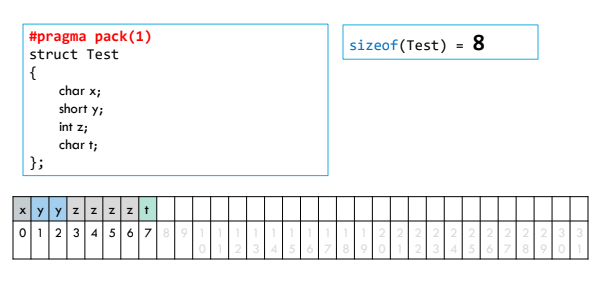

In [10]:
data = struct.pack("=chic", b'A', 1, 2, b'B')

print(len(data))  # standard size, native endian
s = ""
for i in data:
    s += "%02X " % i

print(s)

8
41 01 00 02 00 00 00 42 


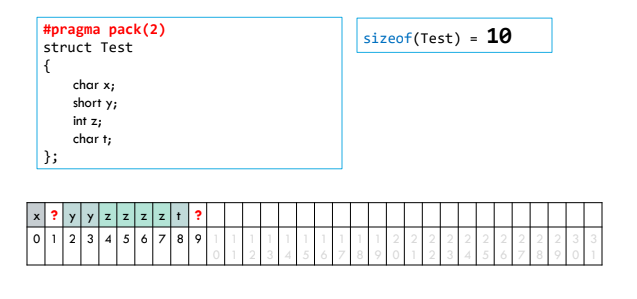

In [11]:
data = struct.pack("@chic0h", b'A', 1, 2, b'B')

print(len(data))  # size would be 9 without 0h
s = ""
for i in data:
    s += "%02X " % i

print(s)

10
41 00 01 00 02 00 00 00 42 00 


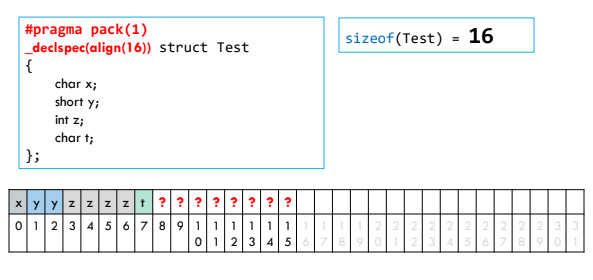

In [12]:
data = struct.pack("=chic0d", b'A', 1, 2, b'B')

print(len(data))  # Will be wrong! Structure padding only works with @
s = ""
for i in data:
    s += "%02X " % i

print(s)

8
41 01 00 02 00 00 00 42 


Solution: Add placeholder bytes

In [13]:
data = struct.pack("=chicxxxxxxxx", b'A', 1, 2, b'B')

print(len(data))
s = ""
for i in data:
    s += "%02X " % i

print(s)

16
41 01 00 02 00 00 00 42 00 00 00 00 00 00 00 00 


In [14]:
data = struct.pack("=chic8x", b'A', 1, 2, b'B') # this also works

print(len(data))
s = ""
for i in data:
    s += "%02X " % i

print(s)

16
41 01 00 02 00 00 00 42 00 00 00 00 00 00 00 00 


Packing and unpacking can be used togheder, in order to convert set values into a byte buffer

In [15]:
data = struct.pack ("@3i10sf",1,2,3,b"Python",1.5)
# 3 integers, string of 10 bytes and a float
print(len(data))
print (struct.unpack("@3i10sf",data))

28
(1, 2, 3, b'Python\x00\x00\x00\x00', 1.5)


Without specifying the length of the string (instead of 10 s will be only s) Will return the first character

In [16]:
data = struct.pack ("@3isf",1,2,3,b"Python",1.5)
# 3 integers, the first character of the string and a float
print(len(data))
print (struct.unpack("@3isf",data))

20
(1, 2, 3, b'P', 1.5)


Despite being for C/C++ binding, also support Pascal strings

In [17]:
data = struct.pack("10p",b'Python')
print(len(data))
s = ""
for i in data:
    s += "%02X " % i

print(s)

10
06 50 79 74 68 6F 6E 00 00 00 


We are allowed to truncate Pascal strings to it's original size while unpacking (Just Once)

In [18]:
result = struct.unpack("10p",struct.pack("10p",b"Python"))
print (result)
result = struct.unpack("10s",struct.pack("10s",b"Python"))
print (result)

(b'Python',)
(b'Python\x00\x00\x00\x00',)
